In [11]:
import scipy as sc
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Overview of SciPy

SciPy is an extensive library for applied mathematics and scientific computation. 
The following is the complete list of all the modules available in the library:

<html>
<body>
<table align=left>
<tr>
    <th>Module</th>
    <th>Functionality</th>
</tr>
<tr>
    <td>cluster</td>
    <td>Clustering algorithms</td>
</tr>
<tr>
    <td>constants</td>
    <td>Physical and mathematical constants</td>
</tr>
<tr>
    <td>fftpack</td>
    <td>Fast Fourier Transform</td>
</tr>
<tr>
    <td>integrate</td>
    <td>Integration and ordinary differential equations</td>
</tr>
<tr>
    <td>interpolate</td>
    <td>Interpolation and splines</td>
</tr>
<tr>
    <td>io</td>
    <td>Input and output</td>
</tr>
<tr>
    <td>linalg</td>
    <td>Linear algebra</td>
</tr>
<tr>
    <td>ndimage</td>
    <td>Image processing</td>
</tr>
<tr>
    <td>odr</td>
    <td>Orthogonal distance regression</td>
</tr>
<tr>
    <td>optimize</td>
    <td>Optimization and root-finding </td>
</tr>
<tr>
    <td>signal</td>
    <td>Signal processing</td>
</tr>
<tr>
    <td>sparse</td>
    <td>Sparse matrices</td>
</tr>
<tr>
    <td>spatial</td>
    <td>Spatial data structures</td>
</tr>
 <tr>
    <td>special</td>
    <td>Special functions</td>
</tr>
<tr>
    <td>stats</td>
    <td>Statistical distributions</td>
</tr>
<tr>
    <td>weave</td>
    <td>C/C++ integration</td>
</tr>
</table>
</body>
</html>

###  function factory pattern of supply and demand

$supply(q) = \frac{K}{1 + L * q}$

$demand(q) = \frac{Aq}{C - Bq}$

In [9]:
def make_supply(A, B, C):
    def supply_func(q):
        return A * q / (C - B * q)
    return supply_func

def make_demand(K, L):
    def demand_func(q):
        return K / (1 + L * q)
    return demand_func

In [10]:
# set params and evaluate supply and demand curves
A, B, C = 23.3, 9.2, 82.4
K, L = 1.2, 0.54
supply = make_supply(A, B, C)
demand = make_demand(K, L)

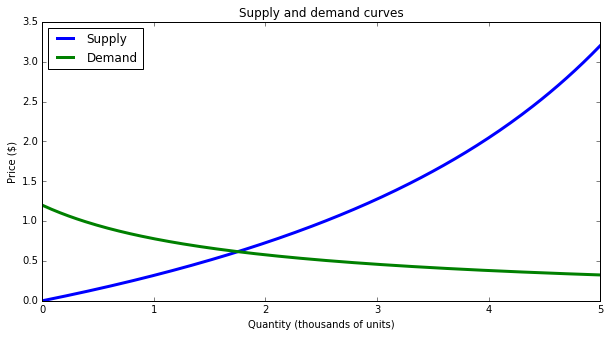

In [20]:
# plotting
q = np.linspace(0.01,5,200)

plt.figure(figsize=(10,5))
plt.plot(q, supply(q), lw = 3)
plt.plot(q, demand(q), lw = 3)
plt.title('Supply and demand curves')
plt.xlabel('Quantity (thousands of units)')
plt.ylabel('Price ($)')
plt.legend(['Supply', 'Demand'], loc='upper left')

To find the equilibrium, we use the *optimize* module, which, besides 
providing functions for optimization, also has functions to solve numerical 
equations. The recommended function to find solutions for one-variable functions 
is *brentq()*.

The *brentq()* function assumes that the right-hand side of the equation we want 
to solve is 0.

In [26]:
from scipy import optimize
def opt_func(q):
    return supply(q) - demand(q)

q_eq = optimize.brentq(opt_func, 1.5, 2.0)
print q_eq, supply(q_eq), demand(q_eq)
# equilibrium quantity, equilibrium price, equilibrium price

1.75322153719 0.616415252177 0.616415252177


### optimization problem with 2 unknowns --> taxicab distance

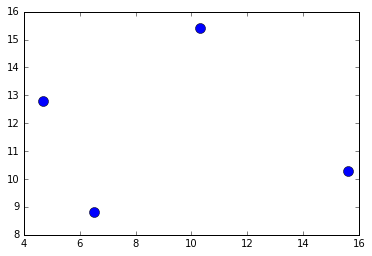

In [30]:
points = np.array([[10.3,15.4],[6.5,8.8],[15.6,10.3],[4.7,12.8]])
plt.plot(points[:,0],points[:,1], 'o', ms=10, mfc='Blue')

In [32]:
def make_txmin(points):
    def txmin_func(p):
        return np.sum(np.abs(points - p))
    return txmin_func

In [33]:
txmin = make_txmin(points)

In [50]:
from scipy import optimize

x0 = np.array([0., 0.])
# Nelder-Mead method is a heuristic algorithm that does not require smoothness of the objective function
res = optimize.minimize(txmin, x0, method='nelder-mead', options={'xtol':1e-5, 'disp':True})

Optimization terminated successfully.
         Current function value: 23.800000
         Iterations: 58
         Function evaluations: 113


In [63]:
print res.x
print 'res => {}'.format(str(res))

[ 10.3      10.30075]
res =>  final_simplex: (array([[ 10.3       ,  10.30075   ],
       [ 10.29999591,  10.30074384],
       [ 10.29999536,  10.30074487]]), array([ 23.8,  23.8,  23.8]))
           fun: 23.799999999999997
       message: 'Optimization terminated successfully.'
          nfev: 113
           nit: 58
        status: 0
       success: True
             x: array([ 10.3    ,  10.30075])


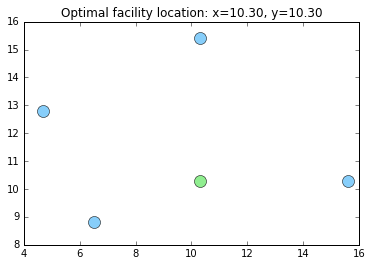

In [67]:
plt.plot(points[:,0], points[:,1], 'o', ms=12, mfc='LightSkyBlue')
plt.plot(res.x[0], res.x[1],'o', ms=12, mfc='LightGreen')
locstr = 'x={:5.2f}, y={:5.2f}'.format(res.x[0], res.x[1])
plt.title('Optimal facility location: {}'.format(locstr))